In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
data=load_iris()
data.data
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
features=pd.DataFrame(data.data,columns=data.feature_names)
features
target=pd.DataFrame(data.target,columns=['target'])
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [4]:
from sklearn.model_selection import cross_val_score,KFold

In [5]:
folds=KFold(5)

In [6]:
from sklearn.svm import SVC

In [7]:
model=SVC()
cv=cross_val_score(model,X=features,y=target,cv=folds)

/Users/saurabhparab/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saurabhparab/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saurabhparab/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saurabhparab/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d

In [8]:
print(cv)

[1.         1.         0.83333333 0.93333333 0.7       ]


In [9]:
from sklearn.model_selection import StratifiedKFold

In [10]:
fold_2=StratifiedKFold(n_splits=10)

In [11]:
cv=cross_val_score(model,X=features,y=target,cv=fold_2)
print(cv)

[1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 0.93333333 1.         1.        ]


/Users/saurabhparab/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saurabhparab/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saurabhparab/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saurabhparab/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knn=KNeighborsRegressor(n_neighbors=10)
cv=cross_val_score(knn,X=features,y=target,cv=folds)
model.fit(features,target)
print(cv)

[1.     0.934  0.     0.8245 0.    ]


/Users/saurabhparab/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
y_pre=model.predict(features)
print(confusion_matrix(target,y_pre))
y_pre
print(classification_report(target,y_pre))

[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [16]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()

In [17]:
tree_model.fit(features,target)
y=tree_model.predict(features)
from sklearn.metrics import accuracy_score
print(accuracy_score(target,y))
print(confusion_matrix(target,y))

1.0
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.33,random_state=42)
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [19]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [20]:
tree_model.fit(x_train,y_train)
y=tree_model.predict(x_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y))
print(confusion_matrix(y_train,y))

1.0
[[31  0  0]
 [ 0 35  0]
 [ 0  0 34]]


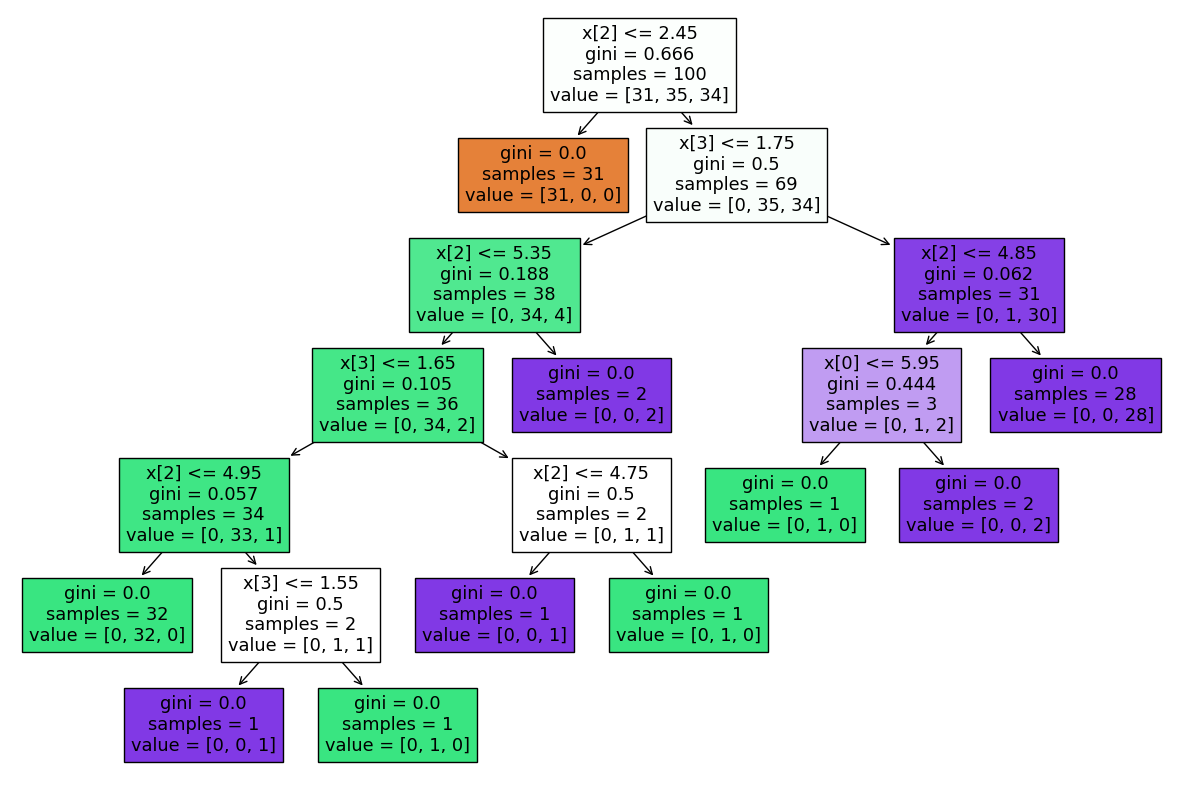

In [21]:
from sklearn import tree
import matplotlib.pyplot as pt
pt.figure(figsize=(15,10))
tree.plot_tree(tree_model,filled=True)
pt.show()

0.98
[[31  0  0]
 [ 0 35  0]
 [ 0  2 32]]


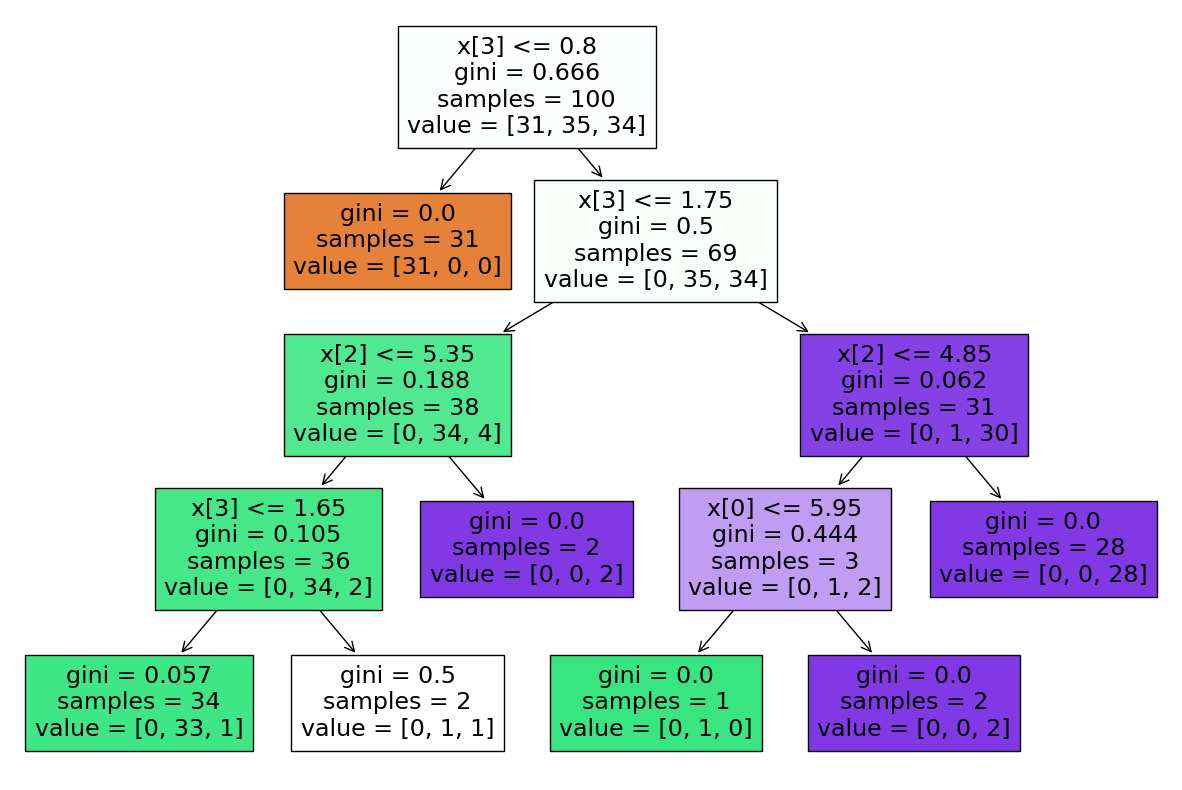

In [22]:
tree_model.set_params(max_depth=4)
tree_model.fit(x_train,y_train)
y=tree_model.predict(x_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y))
print(confusion_matrix(y_train,y))
pt.figure(figsize=(15,10))
tree.plot_tree(tree_model,filled=True)
pt.show()

1.0
[[31  0  0]
 [ 0 35  0]
 [ 0  0 34]]


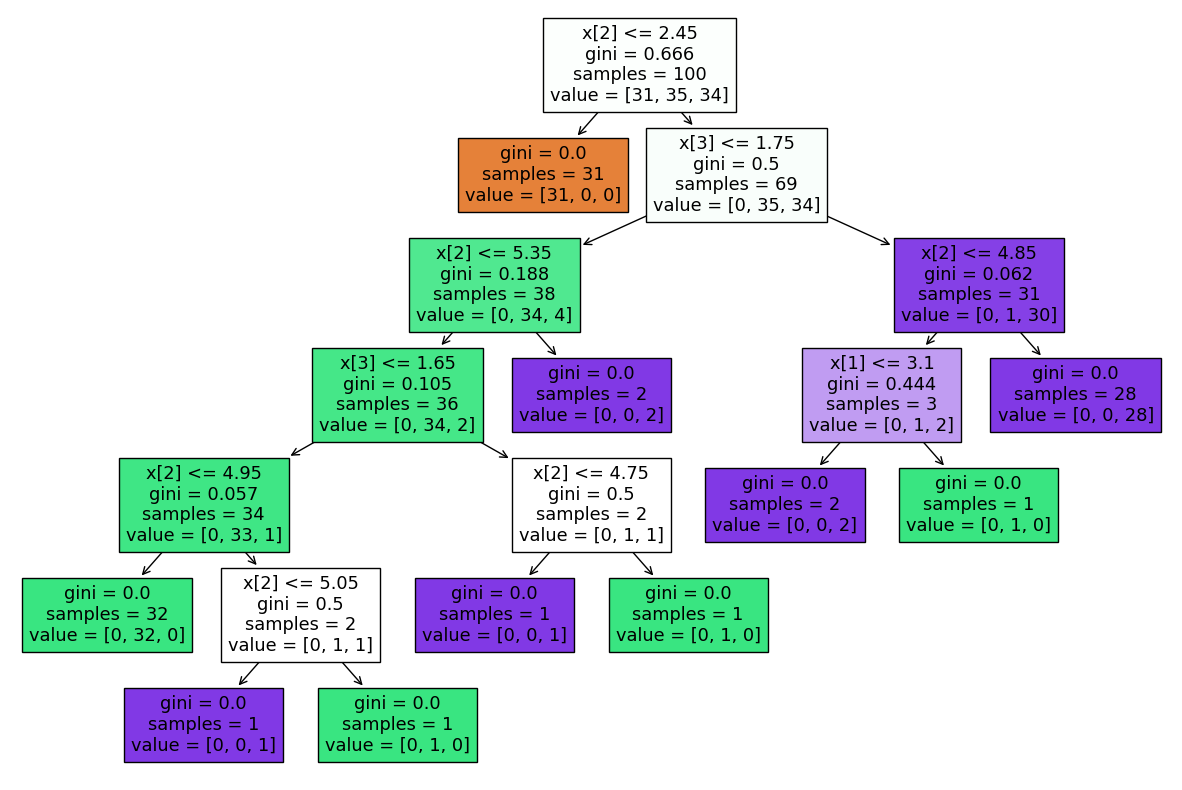

In [23]:
tree_model.set_params(max_depth=6)
tree_model.fit(x_train,y_train)
y=tree_model.predict(x_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y))
print(confusion_matrix(y_train,y))
pt.figure(figsize=(15,10))
tree.plot_tree(tree_model,filled=True)
pt.show()

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [25]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [26]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [27]:
model.fit(x_train,y_train)
train_predict=model.predict(x_train)

In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,train_predict))

[[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]


In [29]:
test_predict=model.predict(x_test)
print(confusion_matrix(y_test,test_predict))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),

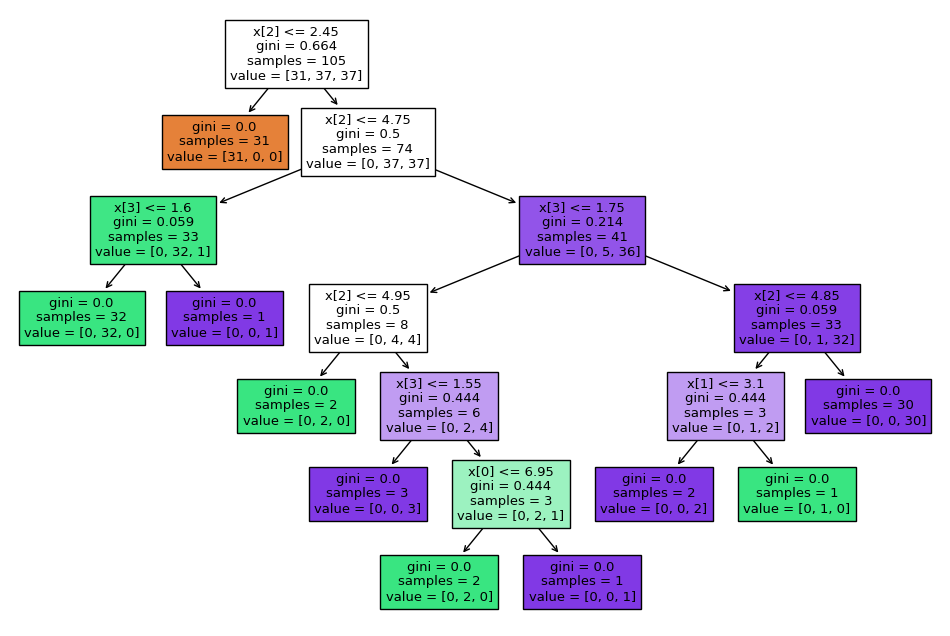

In [30]:
from sklearn import tree
pt.figure(figsize=(12,8))
tree.plot_tree(model,filled=True)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [33]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [34]:
print((y_train,train_predict))

(     target
81        1
133       2
137       2
75        1
109       2
..      ...
71        1
106       2
14        0
92        1
102       2

[105 rows x 1 columns], array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2]))


In [35]:
from sklearn.model_selection import KFold
fold=KFold(n_splits=15)

In [36]:
from sklearn.model_selection import StratifiedKFold

In [37]:
s_folds=StratifiedKFold(n_splits=2)

In [38]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(model,X=features,y=target,cv=fold)
import numpy as np
print(cv)
print(np.mean(cv))

[1.  1.  1.  1.  1.  1.  1.  0.8 0.9 1.  0.9 0.9 0.9 0.9 1. ]
0.9533333333333334


In [39]:
cv=cross_val_score(model,X=features,y=target,cv=s_folds)
print(cv)
print(np.mean(cv))

[0.96       0.94666667]
0.9533333333333334


In [40]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=30)
model.fit(x_train,y_train)
train_predict=model.predict(x_train)
print(confusion_matrix(y_train,train_predict))
test_predict=model.predict(x_test)
print(confusion_matrix(y_test,test_predict))
print(classification_report(y_train,train_predict))
print(classification_report(y_test,test_predict))

[[37  0  0]
 [ 0 37  0]
 [ 0  0 31]]
[[13  0  0]
 [ 0 11  2]
 [ 0  1 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        31

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.85      0.88        13
           2       0.90      0.95      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [41]:
max=[]
for i in range(1,50):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=i)
    model.fit(x_train,y_train)
    train_predict=model.predict(x_train)
    #print(confusion_matrix(y_train,train_predict))
    test_predict=model.predict(x_test)
    #print(confusion_matrix(y_test,test_predict))
    #print(classification_report(y_train,train_predict))
    #print(classification_report(y_test,test_predict))
    max.append(accuracy_score(y_test,test_predict))
    

In [42]:
np.mean(max)

0.9510204081632654

In [77]:
val=StratifiedKFold(n_splits=6)
prun_model=DecisionTreeClassifier(max_depth=5)
cv=cross_val_score(prun_model,X=features,y=target,cv=val)
print(cv)

[0.96 1.   0.92 0.92 0.88 1.  ]


In [78]:
from sklearn.tree import plot_tree

In [79]:
f=features.to_numpy()
t=target.to_numpy()

In [80]:
sets=[]
for i,j in val.split(f,t):
    x_train,x_test=f[i],f[j]
    y_train,y_test=t[i],t[j]
    sets.append({'x_train':x_train,'x_test':x_test,'y_train':y_train,'y_test':y_test})

In [81]:
prun_model.fit(sets[0]['x_train'],sets[0]['y_train'])
model_train=prun_model.predict(sets[0]['x_train'])
from sklearn.metrics import f1_score,accuracy_score

In [82]:
print(accuracy_score(sets[0]['y_train'],model_train))

0.992


In [83]:
print(accuracy_score(sets[0]['y_test'],prun_model.predict(sets[0]['x_test'])))

0.96


[Text(0.3, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 125\nvalue = [41, 42, 42]'),
 Text(0.2, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.4, 0.75, 'x[2] <= 4.75\ngini = 0.5\nsamples = 84\nvalue = [0, 42, 42]'),
 Text(0.3, 0.5833333333333334, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.5, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.19\nsamples = 47\nvalue = [0, 5, 42]'),
 Text(0.2, 0.4166666666666667, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.3, 0.25, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.8, 0.4166666666666667, 'x[2] <= 4.85\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.25, 'x[0] <= 5.95\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.

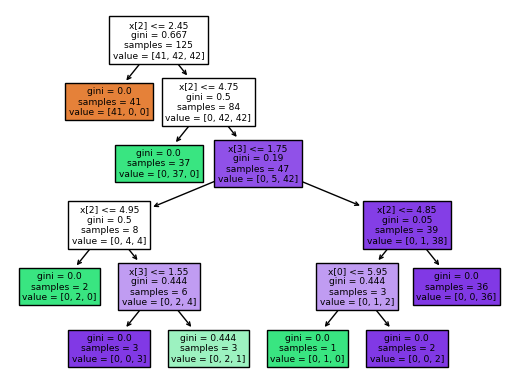

In [84]:
plot_tree(prun_model,filled=True)

In [ ]:
from sklearn.metrics import 